# OUTLINE
 1 Python basics : Setup, syntax & standard libraries
        
 2 Pymatgen 1 : build a structure & write a vasp job
    
 3 Python + slurm + bash : launch a vasp job
    
 4 Pymatgen 2 : read a vasp job & plot DOS
    
 5 Matplotlib : make your own plots 
    
 6 Pymatgen 3 : advanced functionalities (disorder, bader, lobster ... )
    
 7 the read_write library : installation, work flow & examples


# Session 1 : Python Basics
## Installation of working station 
### Mandatory : python and jupyter notebook

CHeck that you have python installed by typing `python3` in the terminal. If you don't, install it : 

`sudo apt-get install python`
	
First install basic  jupyter notebook  

`pip3 install --upgrade pip && pip3 install jupyter` then launch with `jupyter notebook`

### Optionnal : improve your coding environment
* __Easy__ : install *JupyterLab* (more fancy web-based interface) [(try it first if you want)]()

`pip3 install jupyterlab` then launch with `jupyter lab`

* __All-inclusive__ : install [*VS-Code*](https://code.visualstudio.com/) (my personnal preference !)

Complete beautiful and fonctionnal IDE, microsoft BUT opensource, incredible plugins for python, jupyter & git !!!

`sudo snap install --classic code` or [download the .deb here](https://code.visualstudio.com/Download) and do `sudo apt install *.deb`

*Come on, its christmas, treat yourself and use a proper code editor ! *

* __old-school__ : if you are *emacs* fanatic : 

integrate jupyter via the [ein emacs package ](https://github.com/tkf/emacs-ipython-notebook) (emacs ipython notebook)

(beware plot are not interactive)

* __deprecated__ : sorry *vim* is not enough for what we want here ...

## Syntax : 
Variable names are a link to their values (pointer)

Therefore variable have no type, only values have type 

No variable declaration required (declaration 'on the fly')

Python has an efficient garbage collector, no need to suppress variables by hand

In [77]:
a = 1  
print(a,'type', type(a))
a = 1.00005 
print(a,'type', type(a))
a = "hello world" 
print(a,'type', type(a))


1 type <class 'int'>
1.00005 type <class 'float'>
hello world type <class 'str'>


In [91]:
a = 1
b = a # the right part is evaluated and assigned to the left part (pointer)
a = 'minux' 
print(b) 

1


## Data structures : 
useful = list \[1\] // dict { "a": 1 }

less common = set {1} // tuple (1)

In [107]:
# LIST  = key is an int, value can be any object
# read / write value by number (start with 0)
L = [1,2,3]
L.append("soleil")
print( L, "// L[1] = ", L[1])


# DICT = key is a string, value can be any object
# read / write value by name
D = {"a" : 1, "b" : 2,"c" : 3}
D["d"]="soleil"
print( D, "// D['b'] = ", D["b"])


[1, 2, 3, 'soleil'] // L[1] =  2
{'a': 1, 'b': 2, 'c': 3, 'd': 'soleil'} // D['b'] =  2


In [108]:
# other types less usefull

# SET = list with unique members
# useful to avoid doubles
S = {1,2,3,"soleil",2,3,2,3}
print(S) 

# TUPLE = "immutable" list, cannot be modified after creation
# faster iteration than list 
T = (1,2,3, "soleil")
print(T[2])

{'soleil', 1, 2, 3}
3


## logical operators : 


In [6]:
# for loop
for a in [1,2,3] :
    print(a)

print("\n") #escaped character for line break

for a in "abc" : # string = list of letters
    print(a)

1
2
3


a
b
c


__indentation is MANDATORY__

In [7]:
for a in [1,2,3] :
    print(a)
print("linebreak outside loop \n")

for a in [1,2,3] :
    print(a)
    print("linebreak inside loop")

1
2
3
linebreak outside loop 

1
linebreak inside loop
2
linebreak inside loop
3
linebreak inside loop


In [5]:
# if loop
a = 2
if a >= 2 :
    print("a >= 2")
elif a < 1 : 
    print("a < 1")
else :
    print("a = 1")

a >= 2


In [28]:
# list comprehension 
simple_list = [ 2*a for a in [1,2,3,4,5,6,7]]
print("list comprehension : ", simple_list)

#range function (start at 0)
simple_list = [ 2*a for a in range(7)]
print("list comprehension using range() fct : ", simple_list)

# with condition
list_w_condition = [ 2*a for a in range(7) if 2*a<10 ]
print("list with condition : ", list_w_condition)

# dict comprehension with zip of 2 lists
dict_w_condition = { keyword : 2*value for keyword,value in zip("abcdefg",range(7)) if value%2==0}
print("dict comprehension with condition : ", dict_w_condition)
    

list comprehension :  [2, 4, 6, 8, 10, 12, 14]
list comprehension using range() fct :  [0, 2, 4, 6, 8, 10, 12]
list with condition :  [0, 2, 4, 6, 8]
dict comprehension with condition :  {'a': 0, 'c': 4, 'e': 8, 'g': 12}


### Exercise 
display all prime numbers between 0 and 20

In [ ]:
# this is the cell for the exercise ! 

In [24]:
# simple method
L = []
for n in range(2,20) : 
    prime = True
    for p in L :
        if n%p==0 :
            prime = False
    if prime : 
        L.append(n)
print(L)


[2, 3, 5, 7, 11, 13, 17, 19]


In [6]:
# same thing using for / break / else 
L = []
for n in range(2,20) : 
    for p in L :
        if n%p==0 :
            break # exit the for loop 
    else : # executed after a for loop if no break was encountered
        L.append(n)
print(L)

[2, 3, 5, 7, 11, 13, 17, 19]


In [15]:
# nested list comprehension
L = [n for n in range(2,20) if len([ p for p in range(2,n) if n%p==0]) == 0 ]
print(L)

[2, 3, 5, 7, 11, 13, 17, 19]


In [20]:
# the best way : less work, more readable, more reliable
from sympy import primerange # we import a function from a library (see below for more explanation)
print([ n for n in primerange(1, 20)])

[2, 3, 5, 7, 11, 13, 17, 19]


__take home message__ : if you want to do it, someone has already coded it (and probably better than you would)

## Object oriented : Functions, class & instances

__function__ : take several arguments and product several outputs

__class__ : contains values and functions (which are attributes)

__instance__ : Specific member of the class

### Functions

In [9]:
def x_by_2(number) :
        return 2*number	
a = 12
print(x_by_2) # function
print(x_by_2(a)) # value of the function

<function x_by_2 at 0x7efdcdadf378>
24


In [51]:
# there may be several inputs and outputs
def sum_and_diff_and_compare(a,b) :
        return (a+b,a-b,a>b)

sum_and_diff_and_compare(5,7)

(12, -2, False)

In [50]:
def computation_time(time_by_task, number_of_task):
        return time_by_task*number_of_task

print("\nArgument can be refeenced by position (order determines which is which)")
print(computation_time(1, 3))

print("\nreferenced by key word only (order does not count) ")
print(computation_time(time_by_task=1, number_of_task=3))
print(computation_time(number_of_task=3, time_by_task=1))

print( "\nReferenced by a mix of position and kw (here order is important)")
print(computation_time(1, number_of_task=3))
print(computation_time(3, time_by_task=1)) # error


Argument can be refeenced by position (order determines which is which)
3

referenced by key word (order does not count) 
3
3

Referenced by a mix of position and kw (in which case order is important)
3


TypeError: computation_time() got multiple values for argument 'time_by_task'

In [59]:
print("There may be optionnal arguments")
def computation_time(time_by_task, number_of_task, nb_of_nodes=1):
        return time_by_task*number_of_task/nb_of_nodes

print("explicit call to all arguments  Result :", 
                    computation_time(time_by_task=1, number_of_task=3,nb_of_nodes=3 ))        

print("default values provided in the function definition) : nb_of_nodes=1 Result  :",
                    computation_time(time_by_task=1, number_of_task=3)) # default to nb_of_nodes=1


There may be optionnal arguments
explicit call to all arguments  Result : 1.0
default values provided in the function definition) : nb_of_nodes=1 Result  : 3.0


### Class & instances

In [242]:
class Student(): # a class
    pass

print(Student) #  a class 

micheline = Student()
print(micheline) 
# Micheline is "one of the" students
# an object from the class Student (called an instance of the class)
# printed with hexadecimal adress pointer to unique memory location of that instance



<class '__main__.Student'>


In [243]:
# a object has attribute 
micheline.age = 24 # they can be written
print("micheline", micheline.age) # and they can be read

jean_jacques = Student()
jean_jacques.age = 12
print("jean_jacques", jean_jacques.age)

micheline 24
jean_jacques 12


In [249]:
# attribute can also be defined in the class itself
# these class attributes are the same for all
# these attributes can be variables ('work') or functions ('where_do_I_work')

class Student():
    work="ICGM" # shared by all = CLASS attribute

    def where_do_I_work(self):
        print("ICGM !!")

micheline = Student()
micheline.age = 24 # there are attribute specific to each INSTANCE, added after the initialization
print("micheline", micheline.age, micheline.work)
micheline.where_do_I_work()

jean_jacques = Student()
jean_jacques.age = 12
# we improve the string formatting
print("\njean_jacques is {} and works at {}".format(jean_jacques.age, jean_jacques.work)) 
micheline.where_do_I_work()


micheline 24 ICGM
ICGM !!

jean_jacques is 12 and works at ICGM
ICGM !!


In [250]:
# the __init__ mthod is called when creating a new instance (called instanciation)
# instance attributes can be setup at that moment 

class Student():
    work="ICGM" # shared by all 
    def __init__(self, age):
        self.age = age # attribute specific to each INSTANCE, added DURING the initialization

    def is_major(self):
        if self.age >=18 : 
            return True
        else :
            return False


micheline = Student(24) # __init__ function is called when creating the instance
print(type(micheline.is_major    )) 
# micheline.is_major is a functiion

print(type(micheline.is_major()  )) 
# micheline.is_major() is a boolean value : the result of the function 
# no need for argument, the value is stored within the instance 'micheline'

print("micheline can have a beer ? ",micheline.is_major() ) 

jean_jacques = Student(12)
print("jean_jacques can have a beer ? ",jean_jacques.is_major())

<class 'method'>
<class 'bool'>
micheline can have a beer ?  True
jean_jacques can have a beer ?  False


In [129]:
class Student():
    
    def __init__(self, age, name):
        self.age = age
        self.name = name

    
    def is_older_than(self, other_student) :
        if self.age > other_student.age : # comparing instance attribute with function argument
            return True
        else :
            return False

A = Student(24, "micheline")
B = Student(12,"jean_jacques")
print("{} is older than {} ? {} !!!".format(A.name,B.name, A.is_older_than(B) ))
# we give another instance as argument
# this makes the language very readable

micheline is older than jean_jacques ? True !!!


In [132]:
# class inheritance (subclass inherit attributes (variables, functions) and add new ones)
class StudentICGM(Student):
    def __init__(self, age, name):
        Student.__init__(self, age, name)

    def where_do_you_work(self):
        print("I work at ICGM ! youpi !")

A = StudentICGM(24, "micheline")
B = Student(12,"jean_jacques")
print("{} is older than {} ? {} !!!".format(A.name,B.name, A.is_older_than(B) )) # StudentICGM use function & attribute (name) from parent class
A.where_do_you_work()   # ok
B.where_do_you_work() # error because Student class does not have this function

micheline is older than jean_jacques ? True !!!
I work at ICGM ! youpi !


AttributeError: 'Student' object has no attribute 'where_do_you_work'

Now you can read Pymatgen source code or any other module and understand what is going on !!!

### Exercise
Create a class Researcher whith the attributes (Name, Lastname, field, topic)

`jean = Researcher("Jean","Vergnet","chemistry","anionic redox")`

Create a class function `jean.presentation` which returns "I'm Jean Vergnet, a chemistry researcher working on anionic redox"

Create a class function `jean.compare_field(another_reasearcher)` which tell if we work on related field or identical topic


In [ ]:
# space for exercise !

In [45]:
class Researcher():
    
    def __init__(self,name, lastname, field, topic):
        self.name = name
        self.lastname = lastname
        self.field = field
        self.topic = topic

    def presentation(self) : 
        # here we used the string.format() as follow "{instance.attribute}".format(instance)
        return "I'm {0.name} {0.lastname}, a {0.field} researcher working on {0.topic}".format(self)

    def compare_field(self, other_researcher) :
        if self.field == other_researcher.field : # comparison takes 2 "=" (definition takes only one "=")
            if self.topic == other_researcher.topic :
                print("{} & {} work in the exact same topic. WOW !".format(self.name, other_researcher.name))
            else :
                print("{} & {} are doing stuff related, not exactly the same but you know... related".format(self.name, other_researcher.name))
        else :
            print("{} & {} are doing completely different things !!".format(self.name, other_researcher.name))
            

In [46]:
jean = Researcher("Jean","Vergnet","chemistry","anionic redox")
print("\n",jean.presentation())
pierre = Researcher("Pierre","Bourdieu","Social Sciences","social reproduction")
print("\n",pierre.presentation())
jean.compare_field(pierre)
alexander = Researcher("Alexander","Shulgin","chemistry","synthesis")
print("\n",alexander.presentation())
jean.compare_field(alexander)


 I'm Jean Vergnet, a chemistry researcher working on anionic redox

 I'm Pierre Bourdieu, a Social Sciences researcher working on social reproduction
Jean & Pierre are doing completely different things !!

 I'm Alexander Shulgin, a chemistry researcher working on synthesis
Jean & Alexander are doing stuff related, not exactly the same but you know... related


## Modules and libraries
__module__ : a .py file which contains Classes, functions and values 

importing a module = read an external .py file at execution time and allow to acess its functions

__library__ : several interdependant modules which allow specific task

library can be acessed at the top level (1 module which imports all the others) or more specifically by targeting a sub-module

some libraries can use binaries coded in C or fortran for efficiency (math, numpy, scipy, cpython)

In [14]:
import math # import the whole module
print(math.log(1000)) # we use the attribute (function) "log" of the module math
print(math.exp(15))

6.907755278982137
3269017.3724721107


In [15]:
from math import log10 # import only the desired function
log10(1000) # we use directly the function log10, without reference to its module

3.0

### Useful standard librairies 
__os  & shutil__ : navigate and maniputate files and folders (~ bash)

__numpy & Scipy__ : heavy number manipulation (matrix) made simple (coded in C => very efficient) 

In [16]:
import os 
cwd = os.getcwd()
path_to_tmp_folder = os.path.join(cwd,"test_python")
os.mkdir(path_to_tmp_folder)
print("is dir ?",os.path.isdir(path_to_tmp_folder))
print("is file ?",os.path.isfile(path_to_tmp_folder))
os.chdir(path_to_tmp_folder)
print(os.getcwd())

is dir ? True
is file ? False
/home/jvergnet/Documents/scripts/read_write/test_python


In [17]:
import shutil
os.chdir(cwd)
shutil.rmtree(path_to_tmp_folder)
print("dir still exist ?" , os.path.exists(path_to_tmp_folder))


dir still exist ? False


In [48]:
import numpy as np
print("Multi dimensionnal matrices") 
print(np.array([[0,1,2],[4,7,8]]),"\n")

print("Vector construction")
print("1D -vector\n",np.linspace(0,10, num=6))
print("\n2D - matrix\n",np.eye(4),"\n")
print("\n3D and more - tensor\n",np.ones((2,3,4)),"\n")


Multi dimensionnal matrices
[[0 1 2]
 [4 7 8]] 

Vector construction
1D -vector
 [ 0.  2.  4.  6.  8. 10.]

2D - matrix
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 


3D and more - tensor
 [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]] 



In [19]:
print("clever indexing \n select first colum of eye matrix \n", np.eye(4)[:,1] )

print("powerfull operations")
print("\nscalar\n", np.sin(np.eye(4)*np.pi/4))
print("\nterm by term\n", np.subtract(np.ones((4,4)), np.eye(4)))

clever indexing 
 select first colum of eye matrix 
 [0. 1. 0. 0.]
powerfull operations

scalar
 [[0.70710678 0.         0.         0.        ]
 [0.         0.70710678 0.         0.        ]
 [0.         0.         0.70710678 0.        ]
 [0.         0.         0.         0.70710678]]

term by term
 [[0. 1. 1. 1.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [1. 1. 1. 0.]]


# Session 2 : Pymatgen  1 : reading a poscar and writing vasp input
## The Structure module [doc](http://pymatgen.org/pymatgen.core.structure.html) [source code](http://pymatgen.org/_modules/pymatgen/core/structure.html)
* Reading & writing POSCAR or CIF data 
* Modifying a Structure 
## the VaspInputSet module [doc](http://pymatgen.org/pymatgen.io.vasp.sets.html?highlight=vaspinputset)
* Write vasp inputs into a directory (INCAR,POSCAR,KPOINT,POTCAR)
* Modyfiying the default settings


## Lattice & Structure objects

A Structure object represents a crystal structure (lattice + basis). 

A Structure is essentially a list of `PeriodicSites` with the same `Lattice`.

`PeriodicSites` & `Lattice` are both core classes of pymatgen.

Let us now create a CsCl structure from scratch.

A Lattice represents a Bravais lattice. Convenience static functions are provided for the creation of common lattice types from a minimum number of arguments.

In [13]:
import pymatgen as mg
# Creates cubic Lattice with lattice parameter 4.2
lattice = mg.Lattice.cubic(4.2)
print(lattice.parameters)

(4.2, 4.2, 4.2, 90.0, 90.0, 90.0)


In [58]:
structure = mg.Structure(lattice, ["Na", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print("Unit cell vol = {}".format(structure.volume))
print("First site of the structure is {}".format(structure[0]))

Unit cell vol = 74.08800000000001
First site of the structure is [0. 0. 0.] Na


The Structure object contains many useful manipulation functions. Since Structure is essentially a list, it contains a simple pythonic API for manipulation its sites.

In [57]:
structure.make_supercell([2, 1, 1]) #Make a 2 x 2 x 1 supercell of the structure
del structure[0] #Remove the first site
structure.append("Na", [0,0,0]) #Append a Na atom.
structure[-1] = "Li" # Change the last added atom to Li.
structure[0] = "Na", [0.01, 0.5, 0] #Shift the first atom by 0.01 in fractional coordinates in the x-direction.
structure.replace_species({"Cl" : "F"}) # replace all species
print("F indices", structure.indices_from_symbol("F")) # find all F indices
print(structure)

F indices (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)
Full Formula (Na1 Li15 F16)
Reduced Formula: NaLi15F16
abc   :  67.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (32)
  #  SP          a    b    c
---  ----  -------  ---  ---
  0  Na    0.01     0.5  0
  1  F     0.03125  0.5  0.5
  2  F     0.53125  0.5  0.5
  3  F     0.28125  0.5  0.5
  4  F     0.78125  0.5  0.5
  5  F     0.15625  0.5  0.5
  6  F     0.65625  0.5  0.5
  7  F     0.40625  0.5  0.5
  8  F     0.90625  0.5  0.5
  9  F     0.09375  0.5  0.5
 10  F     0.59375  0.5  0.5
 11  F     0.34375  0.5  0.5
 12  F     0.84375  0.5  0.5
 13  F     0.21875  0.5  0.5
 14  F     0.71875  0.5  0.5
 15  F     0.46875  0.5  0.5
 16  F     0.96875  0.5  0.5
 17  Li    0        0    0
 18  Li    0.5      0    0
 19  Li    0.25     0    0
 20  Li    0.75     0    0
 21  Li    0.125    0    0
 22  Li    0.625    0    0
 23  Li    0.375    0    0
 24  Li    0.875    0    0
 25  Li    0        0

#### TO_DO

add property : magmon, charge, selective dynamic 



## Basic analyses

Pymatgen provides many analyses functions for Structures. Some common ones are given below.

In [38]:
#Determining the symmetry
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
finder = SpacegroupAnalyzer(structure)
print("The spacegroup is {}".format(finder.get_space_group_symbol()))

The spacegroup is Pmm2


We also have an extremely powerful structure matching tool.

In [41]:
from pymatgen.analysis.structure_matcher import StructureMatcher
#Let's create two structures which are the same topologically, but with different elements, and one lattice is larger.
s1 = mg.Structure(lattice, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
s2 = mg.Structure(mg.Lattice.cubic(5), ["Rb", "F"], [[0, 0, 0], [0.5, 0.5, 0.5]])
m = StructureMatcher()
print(m.fit_anonymous(s1, s2)) #Returns a mapping which maps s1 and s2 onto each other. Strict element fitting is also available.

True


#### TO_DO
distance matrix to 

get next neighbors 

shortest bond 

## Input/output

In [43]:
#Convenient IO to various formats. Format is intelligently determined from file name and extension.
structure.to(filename="POSCAR")
structure.to(filename="CsCl.cif")

#Or if you just supply fmt, you simply get a string.
print(structure.to(fmt="poscar"))
print(structure.to(fmt="cif"))

Na1 Li1 F2
1.0
8.400000 0.000000 0.000000
0.000000 4.200000 0.000000
0.000000 0.000000 4.200000
Na F Li
1 2 1
direct
0.010000 0.500000 0.000000 Na
0.250000 0.500000 0.500000 F
0.750000 0.500000 0.500000 F
0.000000 0.000000 0.000000 Li

# generated using pymatgen
data_NaLiF2
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   8.40000000
_cell_length_b   4.20000000
_cell_length_c   4.20000000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   NaLiF2
_chemical_formula_sum   'Na1 Li1 F2'
_cell_volume   148.17600000
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Na  Na0  1  0.010000  0.500000  0.000000  1
  F  F1  1  0.250000  0.500000  0.500000  1.0
  F  F2  1  

In [44]:
# Reading a structure from a file.
structure = mg.Structure.from_file("POSCAR")

### Exercise 
* read the cif of LiCoO2
* perform a partial delithiation  (random removal of 1/2 li) 
* replace half Co by Mn (random replacement)
* write the corresponding POSCAR

In [ ]:
# space for exercise here !! 

## VASP INPUTS 

The `pymatgen.io.vasp.sets` module provides a means to obtain a complete set of VASP input files for performing calculations. 

Several presets based on the parameters used in the Materials Project are provided. They can all be changed easily. 

In [3]:
from pymatgen.io.vasp.sets import MPRelaxSet
s = Structure.from_file("ICSD_182730_Si.cif", primitive=True)
relax = MPRelaxSet(s)
relax.write_input("MyInputFiles") 
#Writes a complete set of input files for structure to the directory MyInputFiles

NameError: name 's' is not defined

In [ ]:
#### TO_DO
specify_incar
specify_Kpoints


In [ ]:
incar_settings = {"NELMIN": 5} # user custom incar settings
relax = MPRelaxSet(s, user_incar_settings=incar_settings)
relax.write_input("MyInputFiles") 

# Generate VASP Input for Static Run

In [3]:
from pymatgen.io.vasp.sets import MPStaticSet

custom_settings = {"NELM": 60} # user custom incar settings
static = MPStaticSet.from_prev_calc("Si-relax/", standardize=True,
                                    user_incar_settings=custom_settings)
static.write_input("Si-static")

# Generate VASP Input for Density of State(DOS) and Band Structure(BS) calculation

In [5]:
from pymatgen.io.vasp.sets import MPNonSCFSet

# generate uniform k-points for DOS calc.
custom_settings = {"LAECHG": "False", "LVHAR": "False"} # user custom incar settings
dos = MPNonSCFSet.from_prev_calc("Si-static/", mode="uniform",reciprocal_density=200,
                                 user_incar_settings=custom_settings)
dos.write_input("Si-dos")

# generate k-points along high symmetry line for band structure calc.
band = MPNonSCFSet.from_prev_calc("Si-static/", mode="line", standardize=True,
                                 user_incar_settings=custom_settings)
band.write_input("Si-band")

In [53]:
import os 
os.getcwd()

'/home/jvergnet/Documents/scripts/read_write'

# Session 3 : Python + slurm + bash : launch a vasp job
## launching a job from python
* ssh / sshfs 
* slurm syntax (sbatch, scontrol)
* python subprocess module

In [ ]:
import subprocess
shell_command = 'sbatch {}  {}'.format(workdir, vasp_job)
subprocess.call([shell_command], shell=True)
# allows to launch jobs on the cluster via python

# Session 4 : Pymatgen 2 : read a vasp job & plot DOS
## The Vasprun class
* Parsing vasprun
* extracting data from a Vasprun instance
## Plotting data (using pymatgen plotter)
## Optimization
* Parallelization
* Drone & Computed_entry
    'parameter', 'data'


In [4]:
%matplotlib inline
from pymatgen.io.vasp import Vasprun

In [ ]:
v = Vasprun('Si-dos/vasprun.xml')


## Get total energy and relaxed structure

In [2]:
v = Vasprun("Si-relax/vasprun.xml")
print(v.final_energy) # final total energy
s = v.final_structure
s.to(filename="Si-relax.cif") # save relaxed structure into cif file
print(s) # relaxed structure

-10.8485761 eV
Full Formula (Si2)
Reduced Formula: Si
abc   :   3.876799   3.876799   3.876799
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Si     0.75   0.75   0.75
  1  Si    -0     -0     -0


## Plot Total DOS

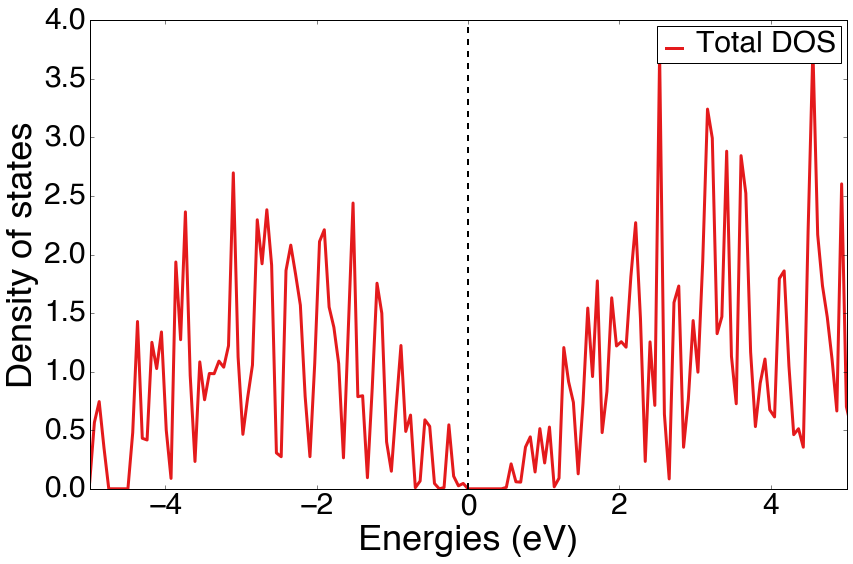

In [6]:
from pymatgen.electronic_structure.plotter import DosPlotter
tdos = v.tdos #total DOS
plotter = DosPlotter()
plotter.add_dos("Total DOS", tdos)
plotter.show(xlim=[-5, 5], ylim=[0, 4])

## Plot element-projected DOS

In [ ]:
v = Vasprun('Si-dos/vasprun.xml')
cdos = v.complete_dos

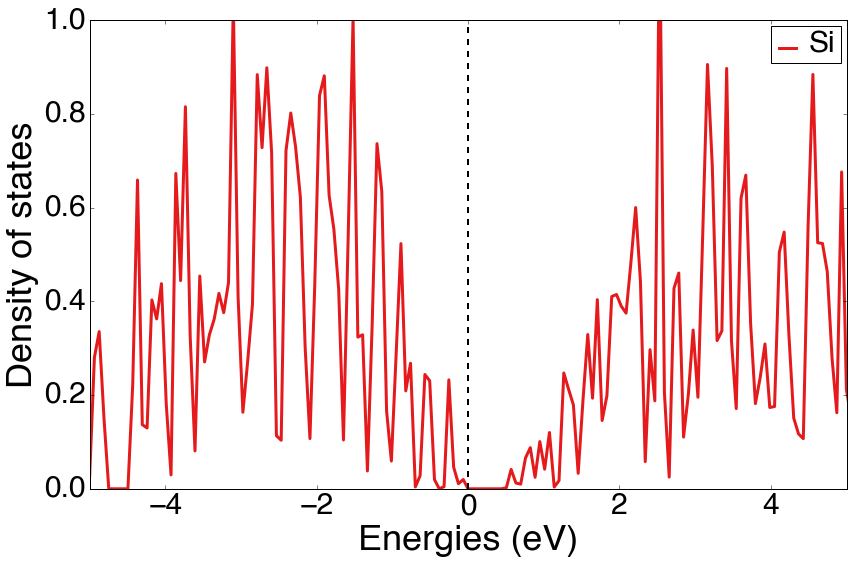

In [7]:
element_dos = cdos.get_element_dos()
plotter = DosPlotter()
plotter.add_dos_dict(element_dos)
plotter.show(xlim=[-5, 5], ylim=[0, 1])

## Plot orbital-projected DOS

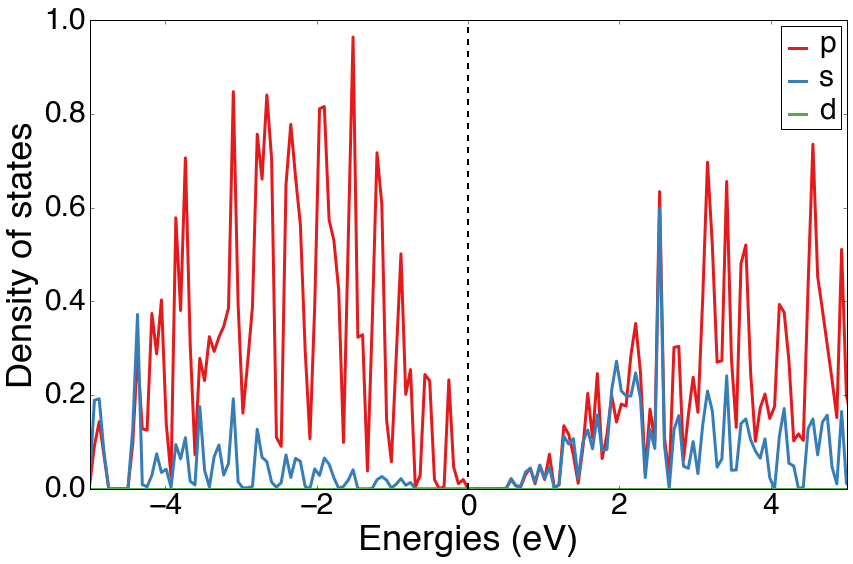

In [2]:
spd_dos = cdos.get_spd_dos()
plotter = DosPlotter()
plotter.add_dos_dict(spd_dos)
plotter.show(xlim=[-5, 5], ylim=[0, 1])

# Plot BS

<module 'matplotlib.pyplot' from '/Users/wzb/.pyenv/versions/3.5.2/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/pyplot.py'>

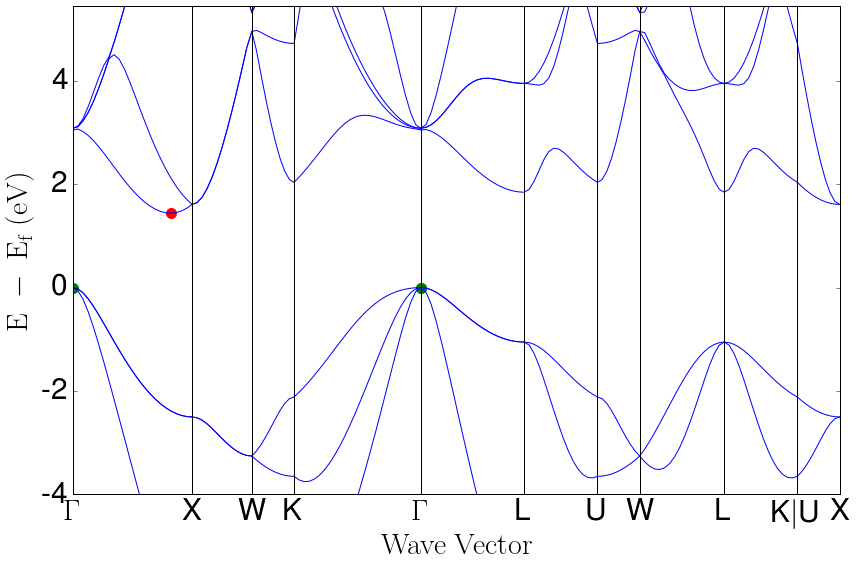

In [3]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import BSPlotter

v = BSVasprun("Si-band/vasprun.xml")
bs = v.get_band_structure(kpoints_filename="Si-band/KPOINTS",
                          line_mode=True)
plt = BSPlotter(bs)
plt.get_plot(vbm_cbm_marker=True)

In [ ]:
from multiprocessing import Pool, cpu_count
import time
import os

time_per_task = 5
number_of_task = 10
nb_cpu = cpu_count() # return nb of cpu on machine => allows optimal parallelization

print("nb cpus", nb_cpu ,"nb of task", number_of_task )
print("with parallelization :", computation_time(time_per_task, number_of_task, nb_of_nodes=nb_cpu))
print("without parallelization :", computation_time(time_per_task, number_of_task))

# dummy example 
list_of_folder_to_parse = [(d) for d in os.listdir(os.getcwd()) if os.path.isdir(d) ][:number_of_task] # we used index slicing to limit the number of folders
def parse_vasprun(folder):
    "a very loooong function"
    print("in folder", folder)
    time.sleep(time_per_task)
    return("parsed folder {} : True".format(folder))

with Pool(processes=nb_cpu) as parallel_runs: # with statement = context manager
        tmp_list = parallel_runs.map(       # map (or starmap) assign a list of arguments to a single function 
                                    parse_vasprun ,           # function to apply 
                                    list_of_folder_to_parse ) # list of distinct arguments for each thread
        parallel_runs.close() # close the threads after execution
        parallel_runs.join()  # wait for the slow ones

print("\n".join(["RESULTS"]+tmp_list))

# Session 5 : Matplotlib : make your own plots 
## basics : 
### keywords, legends, plot acumulation
### basic line, scatter, histogram,... 
## Advanced : 
### the Figure and the Axe classes
### multiple plots

In [ ]:
# Plot types

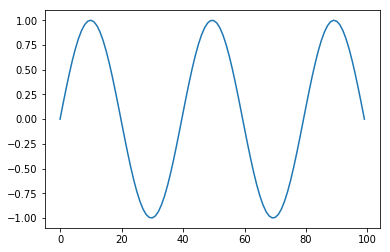

In [167]:
## basic plot
import matplotlib.pyplot as plt
import numpy as np
x_values =  np.linspace(0, 5*np.pi, num=100)
y_values = np.sin(x_values)
plt.plot(y_values) # by default x values are equal to list index

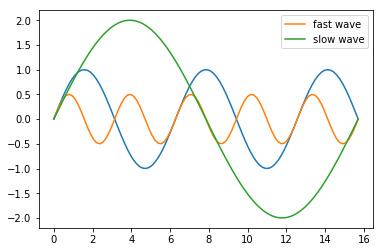

In [179]:
## accumuation & legend
y_values = np.sin(x_values)
y2_values = 1/2*np.sin(2*x_values)
y3_values = 2*np.sin(1/2.5*x_values)
plt.plot(x_values, y_values) 
plt.plot(x_values, y2_values, label = "fast wave") 
plt.plot(x_values, y3_values, label = "slow wave") 
plt.legend()
# colors are added automatically by matplotlib

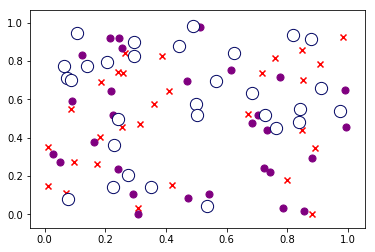

In [228]:
## scatter plot
# more control over the parameters via keywords
values =  np.random.rand(30,6)
plt.scatter(values[:,0], values[:,1], marker="x", color="red") # many keywords to modify aspect
plt.scatter(values[:,2], values[:,3],  marker="o", color="purple", s=50) 
plt.scatter(values[:,4], values[:,5],  marker="o", facecolor="white", edgecolor="xkcd:darkBlue", s=150) # use XKCD survey colors

(array([  1.,  12.,  53., 123., 292., 290., 170.,  46.,  10.,   3.]),
 array([-3.95987365, -3.18547861, -2.41108358, -1.63668854, -0.86229351,
        -0.08789847,  0.68649656,  1.4608916 ,  2.23528663,  3.00968166,
         3.7840767 ]),
 <a list of 10 Patch objects>)

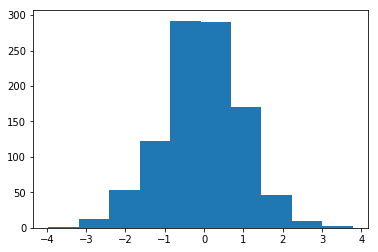

In [210]:
# histogram
x_hist_values =  np.random.normal(size = 1000) 
plt.hist(x_hist_values) 

### 2D PLOTS

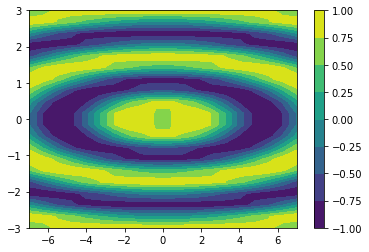

In [230]:
# contour plot
n_points = 20
aa = np.linspace(-7, 7, n_points)
bb = np.linspace(-3, 3, n_points)

def cost_1(a, b):
    return np.sin(2*np.sqrt((a**2+b**2))) # get inventive here ! ;-) 

z_1 = []
for a in aa:
    for b in bb:
        z_1.append(cost_1(a, b))
z_1 = np.reshape(z_1, [len(aa), len(bb)])

plt.contourf(aa, bb, z_1)

plt.colorbar()

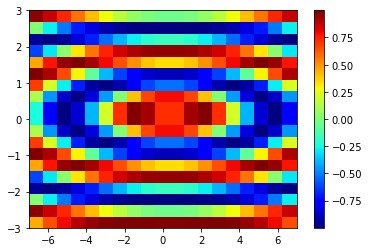

In [231]:
# colormesh
plt.pcolormesh(aa, bb, z_1, cmap='jet') # use a distinct color map for the Z axis
plt.colorbar()

## Advanced plotting

### Anatomy of a plot : a Figure instance which contains Axe instance

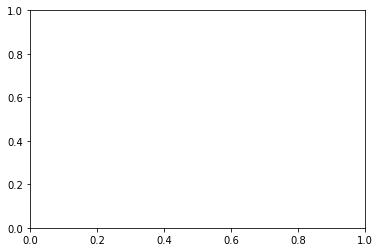

In [190]:
#just the figure (with default blank axe)
fig, axe = plt.subplots()

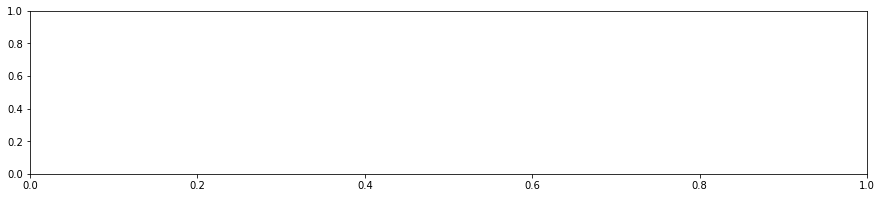

In [203]:
#we modify the figure only (the container)
fig, axe = plt.subplots(figsize=(15,3))

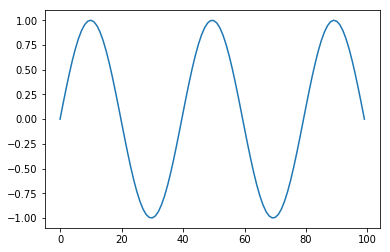

In [191]:
# we modify the axe only
fig, axe = plt.subplots()
axe.plot(y_values) 

## Multiple plots

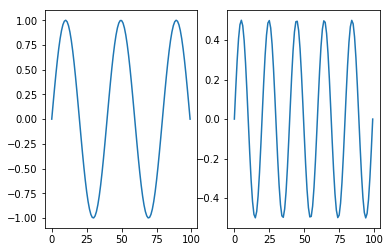

In [206]:
# a figure can have several axes
fig, axes = plt.subplots(ncols=2)
axes[0].plot(y_values)
axes[1].plot(y2_values)

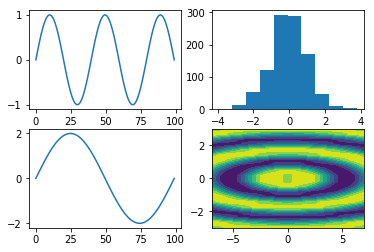

In [236]:
# we access the figure like a matrix
fig, axes = plt.subplots(nrows = 2,ncols=2)
axes[0,0].plot(y_values)
axes[0,1].hist(x_hist_values) 
axes[1,0].plot(y3_values)
axes[1,1].contourf(aa, bb, z_1)

### Exercise 
draw the dos of your run without the plotter

# Session 6 : Pymatgen 3 : advanced functionalities (disorder, bader, lobster ... )

# Session 7 :  the read_write library : installation, work flow & examples